In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

fig_count=0
!rm ../documents/figures/fig*

figsize_x = 6
figsize_y = 6

rs = 19
sig = 0.05

In [2]:
df = pd.read_csv('../data/creditcard_2023.csv', usecols=lambda column: column != 'id')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

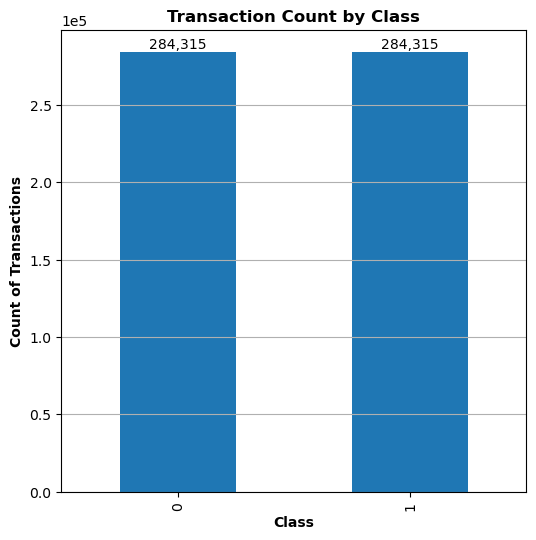

In [4]:
fig_count += 1
plt.figure(figsize=(figsize_x, figsize_y))

class_counts = df['Class'].value_counts()

class_counts.plot(kind='bar')  # or use 'hist' for a histogram

for i, value in enumerate(class_counts.values):
    plt.text(i, value + 0.1, f'{value:,}', ha='center', va='bottom')
    
plt.xlabel('Class', fontweight='bold')
plt.ylabel('Count of Transactions',fontweight='bold')
plt.title('Transaction Count by Class', fontweight='bold')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.grid(axis='y')
plt.savefig(f'../documents/figures/fig_{fig_count}.png')
plt.show()

In [5]:
fraud_prop = 0.01
fraud_size = int((fraud_prop * class_counts[0]) / (1 - fraud_prop))
num_removals = class_counts[1] - fraud_size

In [6]:
condition = df['Class'] == 1
rows_to_remove = df[condition].sample(n=num_removals, random_state=rs)
df = df.drop(rows_to_remove.index)

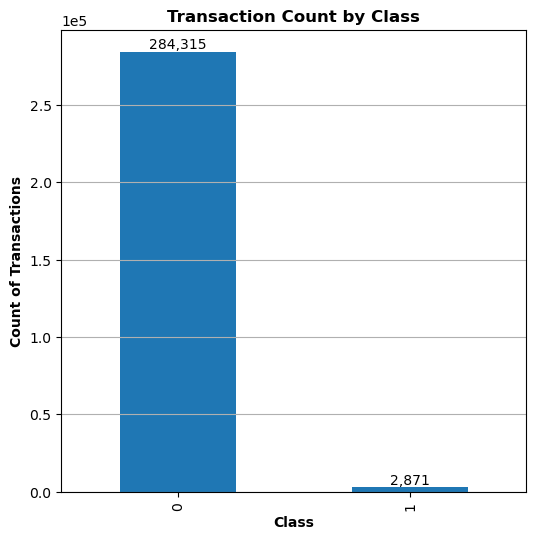

In [7]:
fig_count += 1
plt.figure(figsize=(figsize_x, figsize_y))

class_counts = df['Class'].value_counts()

class_counts.plot(kind='bar')  # or use 'hist' for a histogram

for i, value in enumerate(class_counts.values):
    plt.text(i, value + 0.1, f'{value:,}', ha='center', va='bottom')
    
plt.xlabel('Class', fontweight='bold')
plt.ylabel('Count of Transactions',fontweight='bold')
plt.title('Transaction Count by Class', fontweight='bold')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.grid(axis='y')
plt.savefig(f'../documents/figures/fig_{fig_count}.png')
plt.show()

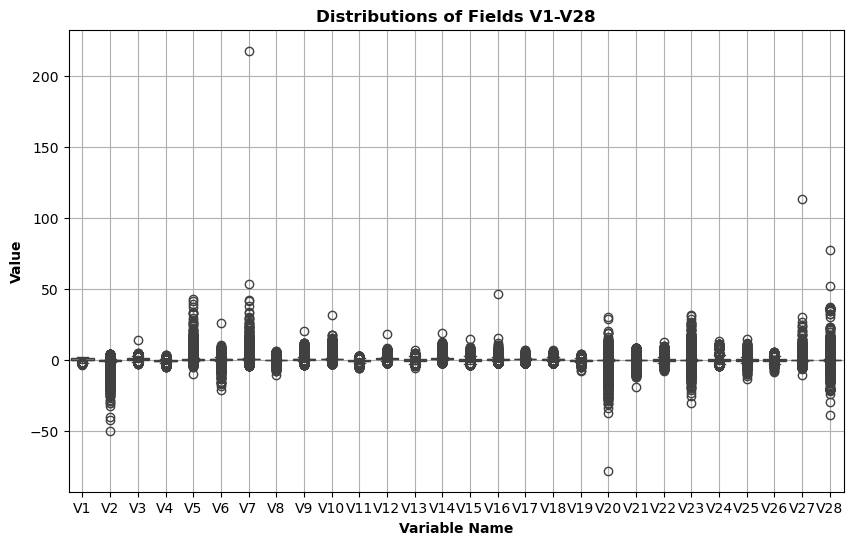

In [8]:
fig_count += 1
plt.figure(figsize=(10,6))
plt_df = df.drop(['Class', 'Amount'], axis=1)


sns.boxplot(data=plt_df)
plt.grid()
plt.xlabel('Variable Name', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.title('Distributions of Fields V1-V28', fontweight='bold')
plt.savefig(f'../documents/figures/fig_{fig_count}.png')
plt.show()

In [9]:
df_X = df.drop(['Class'], axis=1).reset_index(drop=True)
df_y = df['Class'].reset_index(drop=True)
cols_to_scale = df_X.columns

scaler = MinMaxScaler()
df_X = pd.DataFrame(scaler.fit_transform(df[cols_to_scale]), columns=cols_to_scale)
df = pd.concat([df_X, df_y], axis=1)

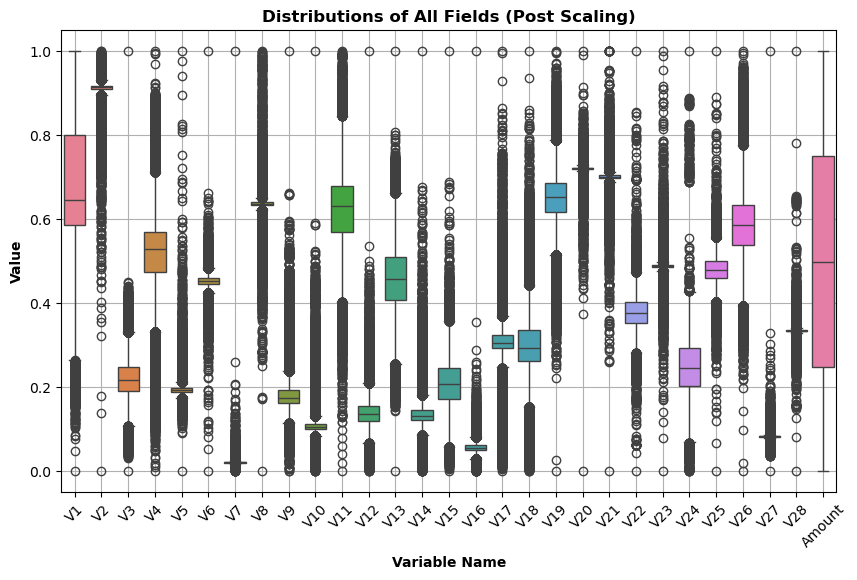

In [10]:
fig_count += 1
plt.figure(figsize=(10,6))

sns.boxplot(data=df_X)
plt.grid()
plt.xlabel('Variable Name', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.title('Distributions of All Fields (Post Scaling)', fontweight='bold')
plt.xticks(rotation=45)
plt.savefig(f'../documents/figures/fig_{fig_count}.png')
plt.show()

In [11]:
df_class0 = df[df['Class'] == 0]
df_class1 = df[df['Class'] == 1]

p_vals = []
for col in cols_to_scale:
    
    group1 = df_class0[col]
    group2 = df_class1[col]
    
    t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    
    p_vals.append(p_value)

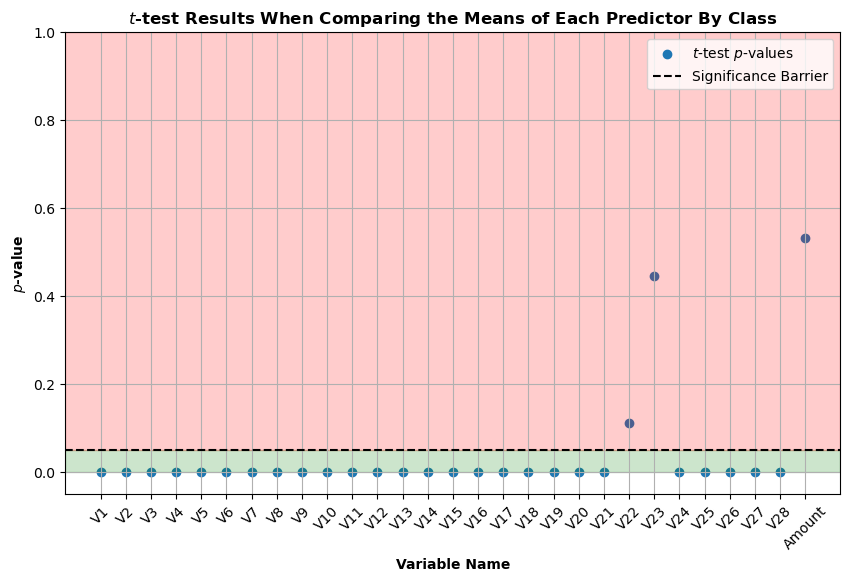

In [12]:
fig_count += 1
plt.figure(figsize=(10, figsize_y))

xs = np.arange(0,len(p_vals))
plt.scatter(xs, p_vals, label='$t$-test $p$-values')
plt.axhline(sig, color='black', ls='--', label='Significance Barrier')
plt.axhspan(0, sig, color='green', alpha=0.2)
plt.axhspan(sig, 1, color='red', alpha=0.2)
plt.xticks(xs, df_X.columns)
plt.xlabel('Variable Name', fontweight='bold')
plt.ylabel('$p$-value', fontweight='bold')
plt.title('$t$-test Results When Comparing the Means of Each Predictor By Class', fontweight='bold')
plt.ylim(-0.05,1)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.savefig(f'../documents/figures/fig_{fig_count}.png')
plt.show()

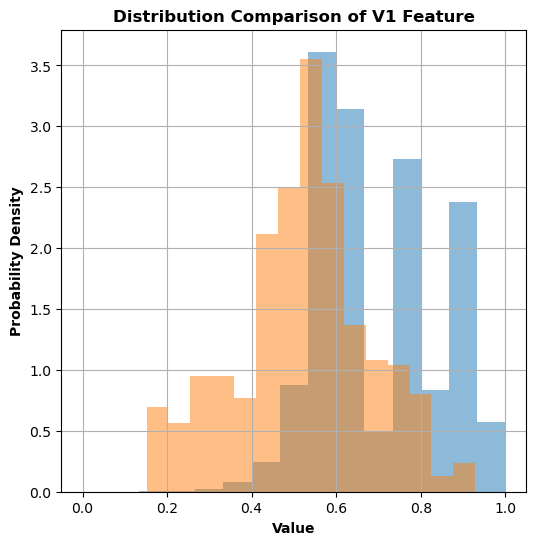

In [13]:
fig_count += 1
plt.figure(figsize=(figsize_x, figsize_y))

group1 = df_class0['V1']
group2 = df_class1['V1']

plt.hist(group1, bins=15, alpha=0.5, density=True, label='Class 0')
plt.hist(group2, bins=15, alpha=0.5, density=True, label='Class 1')

plt.title('Distribution Comparison of V1 Feature', fontweight='bold')
plt.grid()
plt.xlabel('Value', fontweight='bold')
plt.ylabel('Probability Density', fontweight='bold')
plt.savefig(f'../documents/figures/fig_{fig_count}.png')
plt.show()

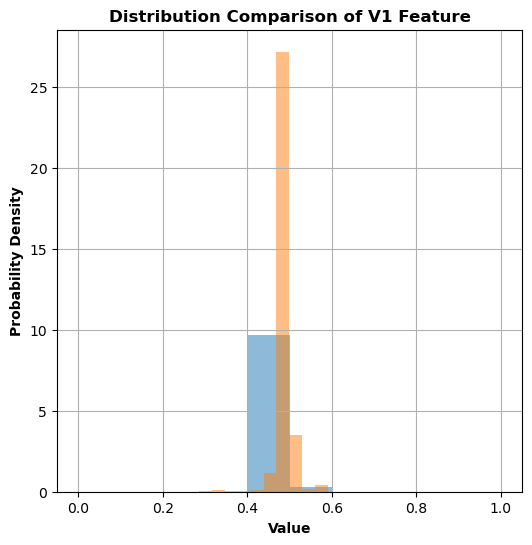

In [14]:
fig_count += 1
plt.figure(figsize=(figsize_x, figsize_y))

group1 = df_class0['V23']
group2 = df_class1['V23']

plt.hist(group1, bins=10, alpha=0.5, density=True, label='Class 0')
plt.hist(group2, bins=10, alpha=0.5, density=True, label='Class 1')

plt.title('Distribution Comparison of V1 Feature', fontweight='bold')
plt.grid()
plt.xlabel('Value', fontweight='bold')
plt.ylabel('Probability Density', fontweight='bold')
plt.show()